In [233]:
import numpy as np
import keras
import pickle
import sklearn
from sklearn.utils import shuffle

In [234]:
with open('x_train_saved.pickle', 'rb') as f:
    x_train = np.array(pickle.load(f))
    
    
with open('y_train_saved.pickle', 'rb') as f:
    y_train = np.array((pickle.load(f)))

In [235]:
x_train = x_train[0,:,:]
y_train = y_train[0,:,:]
print(" x_train shape: ", x_train.shape, "\n", "y_train shape: ", y_train.shape)

 x_train shape:  (5986, 208) 
 y_train shape:  (5986, 4)


In [236]:
x_train = np.vstack(x_train)
x_train = x_train.reshape(x_train.shape[0], 13, 16,1)
y_train = np.vstack(y_train)
x_train, y_train = shuffle(x_train, y_train, random_state=0)

In [237]:
input_shape = (13, 16, 1)

In [238]:
x_train.shape

(5986, 13, 16, 1)

In [239]:
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, Dropout, Flatten
from keras import Sequential
import matplotlib.pyplot as plt


In [268]:
model = Sequential([
    #Dense(10, activation='relu', input_shape=(x_train.shape[1],)),
   Conv2D(20, kernel_size=(4, 4), strides=(1, 1), activation='linear', input_shape=(input_shape)),
    Conv2D(4, kernel_size=(3, 3), strides=(1, 1), activation='linear', input_shape=(input_shape)),

    Dense(20, activation='relu'),
    Flatten(),
    Dense(4, activation='softmax')
])


model.compile(Adam(lr = 0.015),loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 10, 13, 20)        340       
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 8, 11, 4)          724       
_________________________________________________________________
dense_152 (Dense)            (None, 8, 11, 20)         100       
_________________________________________________________________
flatten_37 (Flatten)         (None, 1760)              0         
_________________________________________________________________
dense_153 (Dense)            (None, 4)                 7044      
Total params: 8,208
Trainable params: 8,208
Non-trainable params: 0
_________________________________________________________________


In [269]:
history = model.fit(x_train, y_train, validation_split = 0.2, batch_size = 50, epochs = 20, verbose = 2)

Train on 4788 samples, validate on 1198 samples
Epoch 1/20
 - 3s - loss: 0.6982 - acc: 0.7387 - val_loss: 0.6128 - val_acc: 0.7880
Epoch 2/20
 - 1s - loss: 0.6038 - acc: 0.7717 - val_loss: 0.5971 - val_acc: 0.7755
Epoch 3/20
 - 1s - loss: 0.5867 - acc: 0.7805 - val_loss: 0.5946 - val_acc: 0.7387
Epoch 4/20
 - 1s - loss: 0.5876 - acc: 0.7721 - val_loss: 0.5972 - val_acc: 0.7462
Epoch 5/20
 - 1s - loss: 0.5807 - acc: 0.7740 - val_loss: 0.5770 - val_acc: 0.7638
Epoch 6/20
 - 1s - loss: 0.5763 - acc: 0.7696 - val_loss: 0.5777 - val_acc: 0.7913
Epoch 7/20
 - 1s - loss: 0.5790 - acc: 0.7843 - val_loss: 0.5817 - val_acc: 0.8022
Epoch 8/20
 - 1s - loss: 0.5694 - acc: 0.7797 - val_loss: 0.5905 - val_acc: 0.7913
Epoch 9/20
 - 1s - loss: 0.5644 - acc: 0.7834 - val_loss: 0.5796 - val_acc: 0.8097
Epoch 10/20
 - 1s - loss: 0.5645 - acc: 0.7832 - val_loss: 0.5842 - val_acc: 0.7838
Epoch 11/20
 - 1s - loss: 0.5622 - acc: 0.7874 - val_loss: 0.5779 - val_acc: 0.7888
Epoch 12/20
 - 1s - loss: 0.5552 - ac

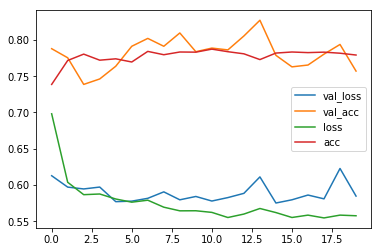

final validation acc:  0.7570951617818842 
final validation loss:  0.5847199339301439 
final acc:  0.7792397605048286 
final loss:  0.5575906569721705


In [270]:
all_data = list(history.history.values())

val_loss, val_acc, loss, acc = all_data[0], all_data[1], all_data[2], all_data[3]

plt.plot(val_loss, label = "val_loss")
plt.plot(val_acc, label = "val_acc")
plt.plot(loss, label = "loss")
plt.plot(acc, label = "acc")
plt.legend(loc='best')

final_element = len(val_acc)-1
plt.show()
print("final validation acc: ", val_acc[final_element],'\n' "final validation loss: ", val_loss[final_element],'\n' "final acc: ", acc[final_element],'\n' "final loss: ", loss[final_element])

In [256]:
model.predict(x_train)

array([[4.2891685e-02, 9.6296855e-05, 9.4994521e-01, 7.0667821e-03],
       [6.8731588e-01, 8.1530407e-06, 3.1253481e-01, 1.4105992e-04],
       [2.6434639e-02, 1.4984739e-04, 9.2187572e-01, 5.1539775e-02],
       ...,
       [2.0283476e-02, 2.9810226e-07, 9.7859734e-01, 1.1188340e-03],
       [4.6258993e-03, 5.6809796e-07, 9.9475420e-01, 6.1931752e-04],
       [6.0523089e-02, 1.6854597e-06, 9.3745583e-01, 2.0194284e-03]],
      dtype=float32)

In [257]:
y_train

array([[0, 0, 1, 0],
       [1, 0, 1, 0],
       [0, 0, 0, 1],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 1, 0]])